In [1]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from moduloAproximacion import evalPoly, polyInterpoLagrange, MultiplicacionSintetica

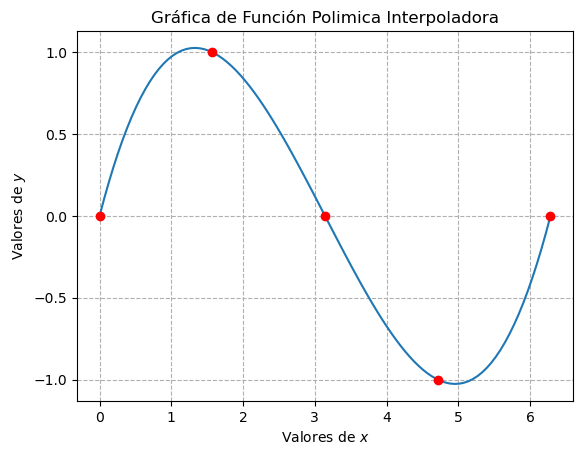

In [4]:
# Definir una función generadora de valores
nodos_x = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
nodos_y = np.array([0, 1, 0, -1, 0])
nodos = (nodos_x, nodos_y)
poly = polyInterpoLagrange(nodos)

x = np.linspace(min(nodos_x), max(nodos_x), 100)
y = evalPoly(poly, x)

# Graficar la función
plt.plot(x, y, label='Gráfica de la Función Polinómica')
plt.scatter(nodos_x, nodos_y, c='red', zorder=3, label='Puntos de Interpolación')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Gráfica de Función Polimica Interpoladora')
plt.grid(linestyle='--')

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Polinomio-Generador.pdf')
plt.show()

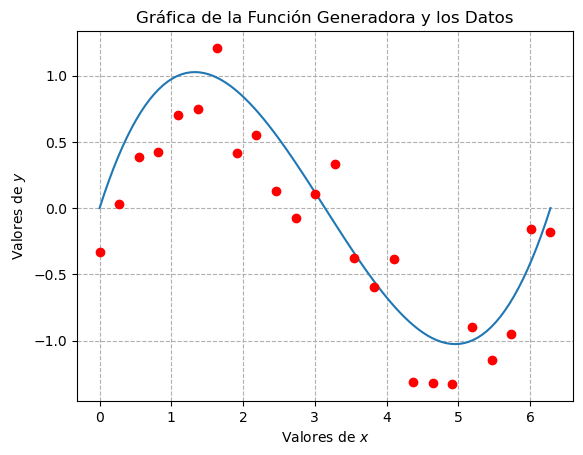

In [8]:
# Generar los datos de entrenamiento
x_train = np.linspace(min(nodos_x), max(nodos_x), 24)
y_train = evalPoly(poly, x_train)

# Generar un ruido sobre los valores de y
ruido = np.random.rand(len(x_train)) - 0.5
y_train = y_train + ruido

# Graficar la función generadora y los puntos generados con ruido
plt.plot(x, y, label='Función Generadora')
plt.scatter(x_train, y_train, c='red', zorder=3, label='Datos')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Gráfica de la Función Generadora y los Datos')
plt.grid(linestyle='--')

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Datos-Generados-Funcion-Polinomica.pdf')
plt.show()

Costo:  0.09405386142252690940539
Pesos entrenados:  [ 0.05604162 -0.51750678  0.9601132   0.16373791]


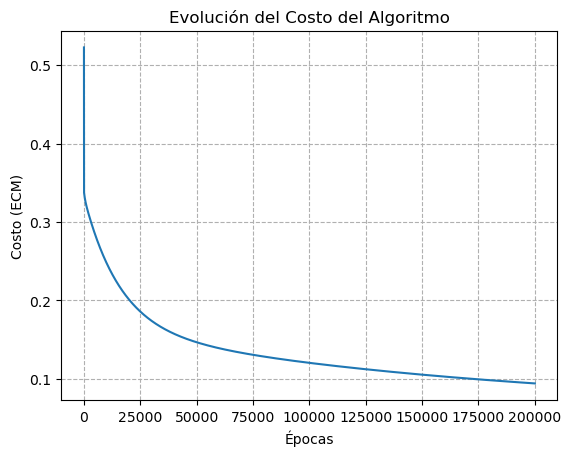

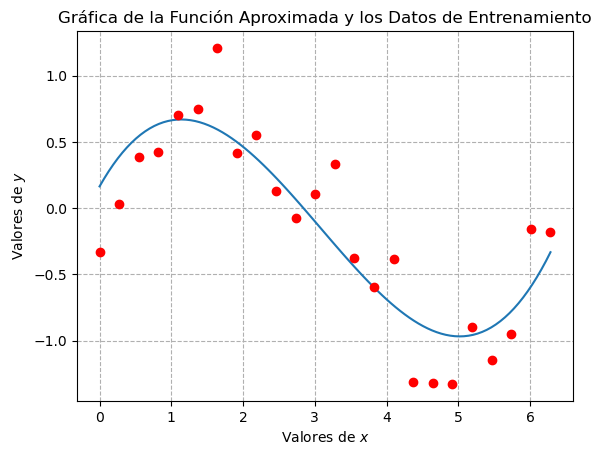

In [81]:
# Inializar los pesos, la tasa de aprendizaje y la cantidad de épocas
W = np.array([0.0, 0.0, 0.0, 0.0])
alfa = 0.00005
epocas = 200000
historial_costo = []
n = len(x_train)
grado = 3

# Entrenar al perceptrón
for epoca in range(epocas):
    
    # Calcular el valor aproximado del polinomio
    y_ = evalPoly(W, x_train)
    
    # Calcular el costo
    costo = np.mean((y_ - y_train)**2)
    historial_costo.append(costo)
    
    # Calcular los gradientes y actualizar los pesos
    for k in range(len(W)):
        dW = (2/n) * np.sum((y_ - y_train) * x_train**(grado-k))
        W[k] = W[k] - alfa*dW
        
    # Mostrar el costo cada 1000 épocas
    if (epoca + 1) % 1000 == 0:
        porcentaje = 100*(epoca+1)/epocas
        print(f"Avance: {porcentaje:.2f}%; Costo: {costo:.7f}", end='\r')
        
# Imprimir los resultados
print("Costo: ", costo)
print("Pesos entrenados: ", W)

# Graficar el historial del costo
plt.plot(range(epocas), historial_costo)
plt.xlabel('Épocas')
plt.ylabel('Costo (ECM)')
plt.title('Evolución del Costo del Algoritmo')
plt.grid(linestyle='--')

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Evolucion-Costo-Aproximacion-Polinomica.pdf')
plt.show()

# Graficar los puntos de entrenamiento y la función encontrada
x_dom = np.linspace(min(x_train), max(x_train), 100)
y_eval = evalPoly(W, x_dom)
plt.plot(x_dom, y_eval, label='Polinomio Aproximado')
plt.scatter(x_train, y_train, c='red', zorder=3, label='Datos de Entrenamiento')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Gráfica de la Función Aproximada y los Datos de Entrenamiento')
plt.grid(linestyle='--')

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Funcion-Polinomica-Aproximada.pdf')
plt.show()
        

Costo:  0.099999969191160350095
Pesos entrenados:  [ 0.05344065 -0.49094034  0.8855067   0.21007999]
Epocas necesarias para el entrenamiento:  171643


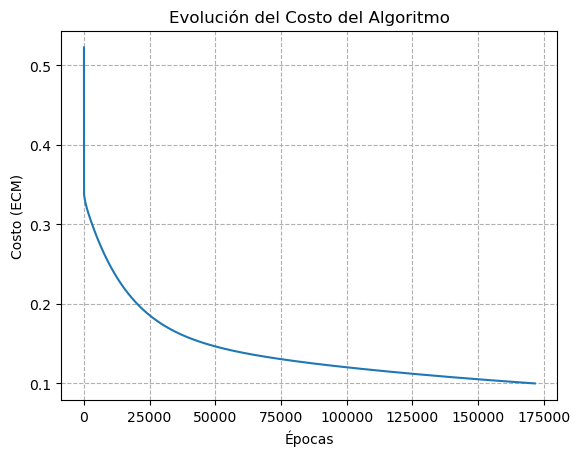

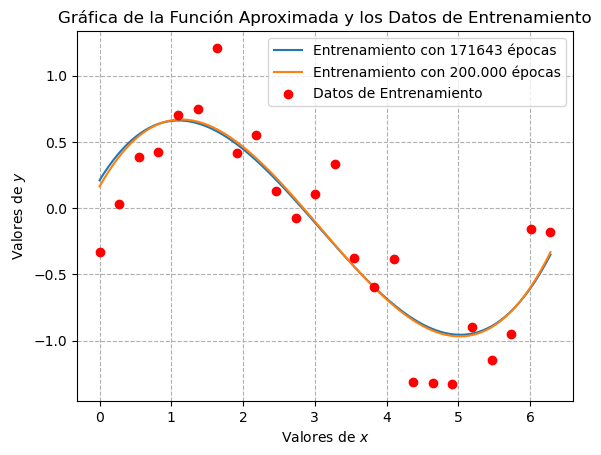

In [83]:
# Inializar los pesos, la tasa de aprendizaje y la cantidad de épocas
W = np.array([0.0, 0.0, 0.0, 0.0])
alfa = 0.00005
historial_costo = []
n = len(x_train)
grado = len(W) - 1
tol = 0.1
epoca = 1
costo = 1

# Entrenar al perceptrón
while (costo > tol):
    
    # Calcular el valor aproximado del polinomio
    y_ = evalPoly(W, x_train)
    
    # Calcular el costo
    costo = np.mean((y_ - y_train)**2)
    historial_costo.append(costo)
    
    # Calcular los gradientes y actualizar los pesos
    for k in range(len(W)):
        dW = (2/n) * np.sum((y_ - y_train) * x_train**(grado-k))
        W[k] = W[k] - alfa*dW
    
    # Mostrar el costo cada 1000 épocas
    if (epoca) % 100 == 0: 
        print(f"Época: {epoca:.0f}; Costo: {costo:.7f}", end='\r')
    
        
    # Incrementar el valor de la época
    epoca = epoca + 1
        
# Imprimir los resultados
print("Costo: ", costo)
print("Pesos entrenados: ", W)
print("Epocas necesarias para el entrenamiento: ",epoca)

# Graficar el historial del costo
plt.plot(range(len(historial_costo)), historial_costo)
plt.xlabel('Épocas')
plt.ylabel('Costo (ECM)')
plt.title('Evolución del Costo del Algoritmo')
plt.grid(linestyle='--')

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Evolucion-Costo-Aproximacion-Polinomica.pdf')
plt.show()

# Graficar los puntos de entrenamiento y la función encontrada
x_dom = np.linspace(min(x_train), max(x_train), 100)
y_eval = evalPoly(W, x_dom)
plt.plot(x_dom, y_eval, label='Entrenamiento con '+str(epoca)+' épocas')

# Datos del entrenamiento anterior
polyAnterior = np.array([ 0.05604162, -0.51750678,  0.9601132,  0.16373791])
y_anterior = evalPoly(polyAnterior, x_dom)
plt.plot(x_dom, y_anterior, label="Entrenamiento con 200.000 épocas")

plt.scatter(x_train, y_train, c='red', zorder=3, label='Datos de Entrenamiento')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Gráfica de la Función Aproximada y los Datos de Entrenamiento')
plt.grid(linestyle='--')
plt.legend()

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Funcion-Polinomica-Aproximada-Metodo-2.pdf')
plt.show()
        

C:\Users\julia\AppData\Local\Temp\ipykernel_5440\3984391944.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[k] = W[k] - alfa*dW


[0.29381232 0.23469503 0.77937391 0.33615063]


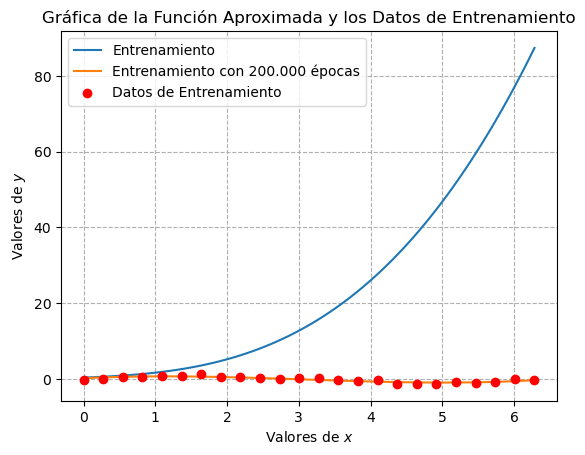

In [86]:
# Definir los hiperpámetros
alfa = 0.00005
grado = 3
n = len(x_train)
Neuronas = {}
historial = []

# Entrenar a la red
for i in range(n): 
    
    for j in range(n):
        
        if i==0:
            # Se crean los pesos iniciales aleatorios
            W = np.random.rand(grado + 1)
        else:
            # Se toman los pesos de la neurona anterior
            W = Neuronas["N_"+str(i-1)+"_"+str(j)]

        # Calcular la predición y el error
        x = x_train[i]
        x_ = np.array([x])
        y_ = evalPoly(W, x_)
        y = y_train[i]
        error = y_ - y

        # Calcular el costo
        costo = (y_ - y)**2
        historial.append(costo)

        # Calculo los gradientes y actualizó los pesos
        for k in range(grado + 1):
            dW = 2 * (y_ - y) * x**(grado - k)
            W[k] = W[k] - alfa*dW

        # Agregar los pesos encontrados de la nuerona
        Neuronas["N_"+str(i)+"_"+str(j)] = W
        
print(W)

# Graficar los puntos de entrenamiento y la función encontrada
x_dom = np.linspace(min(x_train), max(x_train), 100)
y_eval = evalPoly(W, x_dom)
plt.plot(x_dom, y_eval, label='Entrenamiento')

# Datos del entrenamiento anterior
polyAnterior = np.array([ 0.05604162, -0.51750678,  0.9601132,  0.16373791])
y_anterior = evalPoly(polyAnterior, x_dom)
plt.plot(x_dom, y_anterior, label="Entrenamiento con 200.000 épocas")

plt.scatter(x_train, y_train, c='red', zorder=3, label='Datos de Entrenamiento')
plt.xlabel('Valores de $x$')
plt.ylabel('Valores de $y$')
plt.title('Gráfica de la Función Aproximada y los Datos de Entrenamiento')
plt.grid(linestyle='--')
plt.legend()

# Mostrar y guardar la gráfica
plt.savefig('../Teoria-Aproximacion/Imagenes/Funcion-Polinomica-Aproximada-Metodo-3.pdf')
plt.show()